# 04. Self Oil Station Price Analysis

## 1. 셀레니움 설치
- 윈도우, mac(intel)
    - conda install selenium
- mac(m1)
    - pip install selenium
- chromedriver

In [6]:
# !pip install selenium

  Using cached selenium-4.25.0-py3-none-any.whl.metadata (7.1 kB)
Using cached selenium-4.25.0-py3-none-any.whl (9.7 MB)


In [7]:
!pip list | findstr "sele"

selenium                  4.25.0


In [11]:
# selenium version 4부터는 google driver 설치가 별도로 필요하지 않음
# driver version 관리는 Selenium Manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service 

In [13]:
# ChromeDriver 자동 다운로드를 위한 ChromeOptions 설정
options = webdriver.ChromeOptions()

# WebDriver Service 객체 생성
service = Service()  # ChromeDriver 경로를 지정하지 않음

# Chrome 브라우저 열기
driver = webdriver.Chrome(service=service, options=options)
driver.get("https://naver.com")

In [14]:
driver.quit()

## 2. 셀프 주유소가 정말 저렴한가? - 데이터 확보 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [1]:
from selenium import webdriver

In [2]:
# 페이지 접근
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome()
driver.get(url)

- 문제
    - 1. 해당 URL로 한 번에 접근 불가하다면?
    - 2. 메인페이지로 접속되고 팝업창 발생한다면?

In [12]:
# 팝업창 화면 전환 후 닫기
driver.switch_to.window(driver.window_handles[-1])
# 팝업창 닫아주기
driver.close()

In [14]:
# 메인화면 창으로 전환
driver.switch_to.window(driver.window_handles[-1])
# 접근 URL 다시 요청
driver.get(url)

In [ ]:
driver.close()

In [42]:
import time

def main_get():
    # 페이지 접근
    url_one = "https://www.opinet.co.kr" # 정상작동해서 임의로 메인화면 url과 목적 url 따로 줌
    url_two = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome()
    driver.get(url_one)
    time.sleep(6)
    # 팝업창으로 전환
    driver.switch_to.window(driver.window_handles[-1])
    # 팝업창 닫아주기
    driver.close()
    # 메인화면 창으로 전환
    driver.switch_to.window(driver.window_handles[-1])
    # 접근 URL 다시 요청
    driver.get(url_two)
    time.slee(10)

In [41]:
main_get()

In [3]:
# 지역: 시/도
from selenium.webdriver.common.by import By

sido_list_raw = driver.find_elements(By.ID, "SIDO_NM0")

for sido in sido_list_raw:
    print(sido.text)

            시/도
            
             
              서울
             
             
            
             
             
              부산
             
            
             
             
              대구
             
            
             
             
              인천
             
            
             
             
              광주
             
            
             
             
              대전
             
            
             
             
              울산
             
            
             
             
              세종
             
            
             
             
              경기
             
            
             
             
              강원
             
            
             
             
              충북
             
            
             
             
              충남
             
            
             
             
              전북
             
            
             
             
       

In [4]:
# 첫 번째 요소에서 <option> 태그 찾기
sido_list = sido_list_raw[0].find_elements(By.TAG_NAME, "option")
len(sido_list), sido_list[17].text

(18, '제주')

In [5]:
sido_list[1].get_attribute("value")

'서울특별시'

In [6]:
# 1.
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute("value"))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [7]:
# 2.
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [8]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [9]:
sido_names[0]

'서울특별시'

In [10]:
sido_list_raw[0].send_keys(sido_names[0])

In [11]:
# 구

gu_list_raw = driver.find_element(By.ID, "SIGUNGU_NM0") # 부모 태그
gu_list = gu_list_raw.find_elements(By.TAG_NAME, "option") # 자식 태그

gu_names = [option.get_attribute("value") for option in gu_list]
gu_names = gu_names[1:]
gu_names[:5], len(gu_names)

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [12]:
gu_list_raw.send_keys(gu_names[15])

In [20]:
# 엑셀 저장
driver.find_element(By.CSS_SELECTOR, ".btn_type6_ex_save").click()

In [14]:
driver.find_element(By.XPATH, '//*[@id="templ_list0"]/div[7]/div/a')

<selenium.webdriver.remote.webelement.WebElement (session="ec1a96ace741e86e8ccfb15cd86dccab", element="f.777F1A86C8976E9FB960F24B56965936.d.ECC174CD28A80382F340E88BAF8DE239.e.4104")>

In [15]:
element_get_excel = driver.find_element(By.ID, "templ_list0")
element_get_excel.click()

In [21]:
import time
from tqdm.notebook import tqdm

for gu in tqdm(gu_names):
    element = driver.find_element(By.ID, "SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(3)

    element_get_excel = driver.find_element(By.CSS_SELECTOR, ".btn_type6_ex_save").click()
    time.sleep(3)

  0%|          | 0/25 [00:00<?, ?it/s]

In [22]:
driver.close()

## 4. 데이터 정리하기

In [18]:
import pandas as pd
from glob import glob

In [19]:
# !pip install glob

In [24]:
# 파일 목록 한 번에 가져오기
glob("../data/지역_*.xls")

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [25]:
# 파일명 저장
stations_files = glob("../data/지역_*.xls")
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [27]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
28,서울특별시,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,HD현대오일뱅크,02-518-5631,N,2698,2458,2248,-
29,서울특별시,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2830,2590,2550,1850


In [28]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

- 형식이 동일하고 연달아 붙이기만 하면 될 때, concat

In [50]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,1783,1592,1432,-
1,서울특별시,HD현대오일뱅크㈜직영 강남셀프주유소,서울 강남구 도곡로 208,HD현대오일뱅크,02-3462-0018,Y,1939,1599,1514,-
2,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1869,1615,1438,-
3,서울특별시,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718,HD현대오일뱅크,02-529-5101,Y,1819,1626,1534,-
4,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1627,1469,-
...,...,...,...,...,...,...,...,...,...,...
7,서울특별시,(주)태영 구도일주유소 한인,서울 중랑구 망우로 170,S-OIL,02-438-5151,Y,1797,1597,1397,-
8,서울특별시,신내주유소,서울 중랑구 용마산로 705 (신내동),SK에너지,02-2207-0523,Y,-,1599,1432,1450
9,서울특별시,범아주유소,서울 중랑구 동일로 881,S-OIL,02-974-8356,N,-,1619,1449,1600
10,서울특별시,용마로주유소,서울 중랑구 용마산로 309 (면목동),SK에너지,02-439-3037,Y,-,1698,1498,1600


In [51]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 0 to 11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      436 non-null    object
 1   상호      436 non-null    object
 2   주소      436 non-null    object
 3   상표      436 non-null    object
 4   전화번호    436 non-null    object
 5   셀프여부    436 non-null    object
 6   고급휘발유   436 non-null    object
 7   휘발유     436 non-null    int64 
 8   경유      436 non-null    int64 
 9   실내등유    436 non-null    object
dtypes: int64(2), object(8)
memory usage: 37.5+ KB


In [52]:
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"],
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"],    
})
stations.tail()

,상호,주소,가격,셀프,상표
7,(주)태영 구도일주유소 한인,서울 중랑구 망우로 170,1597,Y,S-OIL
8,신내주유소,서울 중랑구 용마산로 705 (신내동),1599,Y,SK에너지
9,범아주유소,서울 중랑구 동일로 881,1619,N,S-OIL
10,용마로주유소,서울 중랑구 용마산로 309 (면목동),1698,Y,SK에너지
11,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1698,Y,SK에너지


In [53]:
for eachAddress in stations["주소"]:
    print(eachAddress.split()[1])

강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구


In [54]:
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1592,Y,SK에너지,강남구
1,HD현대오일뱅크㈜직영 강남셀프주유소,서울 강남구 도곡로 208,1599,Y,HD현대오일뱅크,강남구
2,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,1615,Y,HD현대오일뱅크,강남구
3,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718,1626,Y,HD현대오일뱅크,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1627,Y,GS칼텍스,강남구
...,...,...,...,...,...,...
7,(주)태영 구도일주유소 한인,서울 중랑구 망우로 170,1597,Y,S-OIL,중랑구
8,신내주유소,서울 중랑구 용마산로 705 (신내동),1599,Y,SK에너지,중랑구
9,범아주유소,서울 중랑구 동일로 881,1619,N,S-OIL,중랑구
10,용마로주유소,서울 중랑구 용마산로 309 (면목동),1698,Y,SK에너지,중랑구


In [55]:
stations["구"].unique(), len(stations["구"].unique())

(array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
        '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
        '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object),
 25)

In [42]:
# stations[stations["구"] == "서울특별시"]
# stations.loc[stations["구"] == "서울특별시", "구"] = "성동구"
# stations[stations["구"] == "특별시"]
# stations.loc[stations["구"] == "특별시", "구"] = "도봉구"

In [56]:
# 가격 데이터형 변환 object => float
stations["가격"] = stations["가격"].astype("float")

In [57]:
# 가격 정보 없는 주유소
stations[stations["가격"] == "-"]

,상호,주소,가격,셀프,상표,구


In [58]:
# 가격 정보가 있는 주유소만 사용
stations = stations[stations["가격"] != "-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
7,(주)태영 구도일주유소 한인,서울 중랑구 망우로 170,1597.0,Y,S-OIL,중랑구
8,신내주유소,서울 중랑구 용마산로 705 (신내동),1599.0,Y,SK에너지,중랑구
9,범아주유소,서울 중랑구 동일로 881,1619.0,N,S-OIL,중랑구
10,용마로주유소,서울 중랑구 용마산로 309 (면목동),1698.0,Y,SK에너지,중랑구
11,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1698.0,Y,SK에너지,중랑구


In [59]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 0 to 11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      436 non-null    object 
 1   주소      436 non-null    object 
 2   가격      436 non-null    float64
 3   셀프      436 non-null    object 
 4   상표      436 non-null    object 
 5   구       436 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.8+ KB


In [61]:
stations

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1592.0,Y,SK에너지,강남구
1,HD현대오일뱅크㈜직영 강남셀프주유소,서울 강남구 도곡로 208,1599.0,Y,HD현대오일뱅크,강남구
2,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,1615.0,Y,HD현대오일뱅크,강남구
3,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718,1626.0,Y,HD현대오일뱅크,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1627.0,Y,GS칼텍스,강남구
...,...,...,...,...,...,...
7,(주)태영 구도일주유소 한인,서울 중랑구 망우로 170,1597.0,Y,S-OIL,중랑구
8,신내주유소,서울 중랑구 용마산로 705 (신내동),1599.0,Y,SK에너지,중랑구
9,범아주유소,서울 중랑구 동일로 881,1619.0,N,S-OIL,중랑구
10,용마로주유소,서울 중랑구 용마산로 309 (면목동),1698.0,Y,SK에너지,중랑구


In [63]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
431,7,(주)태영 구도일주유소 한인,서울 중랑구 망우로 170,1597.0,Y,S-OIL,중랑구
432,8,신내주유소,서울 중랑구 용마산로 705 (신내동),1599.0,Y,SK에너지,중랑구
433,9,범아주유소,서울 중랑구 동일로 881,1619.0,N,S-OIL,중랑구
434,10,용마로주유소,서울 중랑구 용마산로 309 (면목동),1698.0,Y,SK에너지,중랑구
435,11,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1698.0,Y,SK에너지,중랑구


In [64]:
stations.head()

,index,상호,주소,가격,셀프,상표,구
0,0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1592.0,Y,SK에너지,강남구
1,1,HD현대오일뱅크㈜직영 강남셀프주유소,서울 강남구 도곡로 208,1599.0,Y,HD현대오일뱅크,강남구
2,2,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,1615.0,Y,HD현대오일뱅크,강남구
3,3,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718,1626.0,Y,HD현대오일뱅크,강남구
4,4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1627.0,Y,GS칼텍스,강남구


In [65]:
del stations["index"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1592.0,Y,SK에너지,강남구
1,HD현대오일뱅크㈜직영 강남셀프주유소,서울 강남구 도곡로 208,1599.0,Y,HD현대오일뱅크,강남구
2,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,1615.0,Y,HD현대오일뱅크,강남구
3,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718,1626.0,Y,HD현대오일뱅크,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1627.0,Y,GS칼텍스,강남구


In [66]:
stations.tail()

,상호,주소,가격,셀프,상표,구
431,(주)태영 구도일주유소 한인,서울 중랑구 망우로 170,1597.0,Y,S-OIL,중랑구
432,신내주유소,서울 중랑구 용마산로 705 (신내동),1599.0,Y,SK에너지,중랑구
433,범아주유소,서울 중랑구 동일로 881,1619.0,N,S-OIL,중랑구
434,용마로주유소,서울 중랑구 용마산로 309 (면목동),1698.0,Y,SK에너지,중랑구
435,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1698.0,Y,SK에너지,중랑구


## 5. 주유 가격 정보 시각화

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system...")

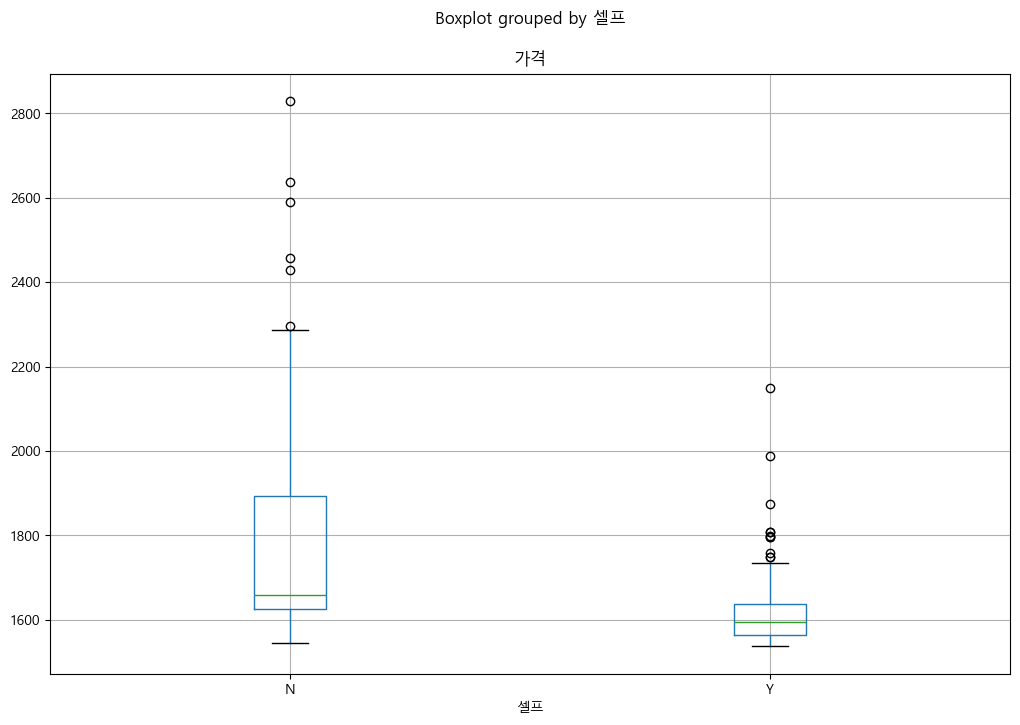

In [72]:
# boxplot(feat. pandas)

stations.boxplot(column="가격", by="셀프", figsize=(12, 8));

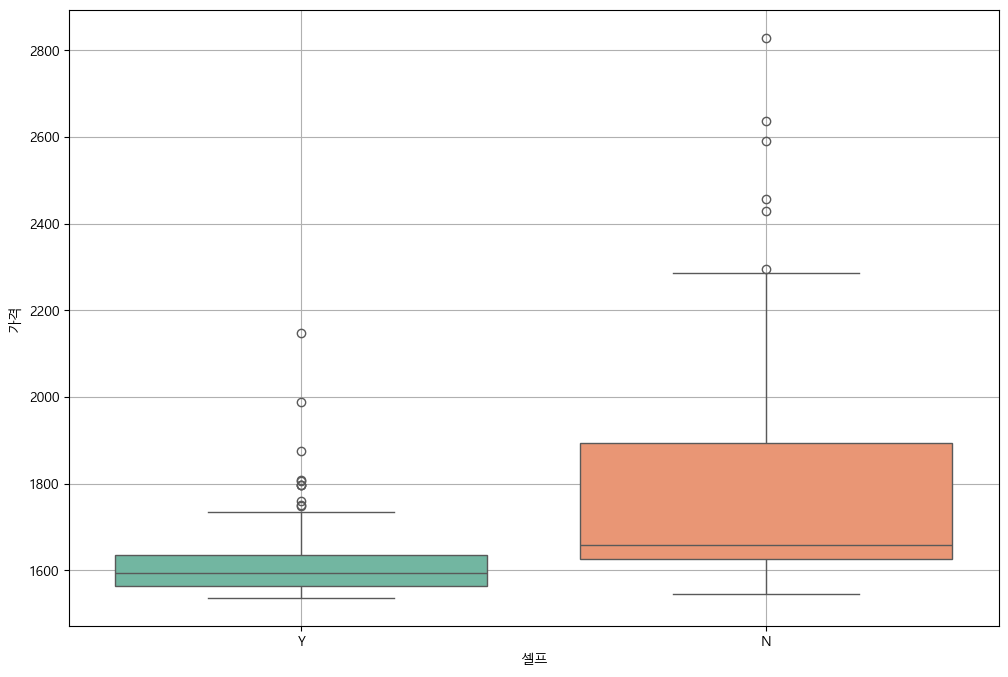

In [87]:
# bloxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set2", hue="셀프")
plt.grid(True)
plt.show()

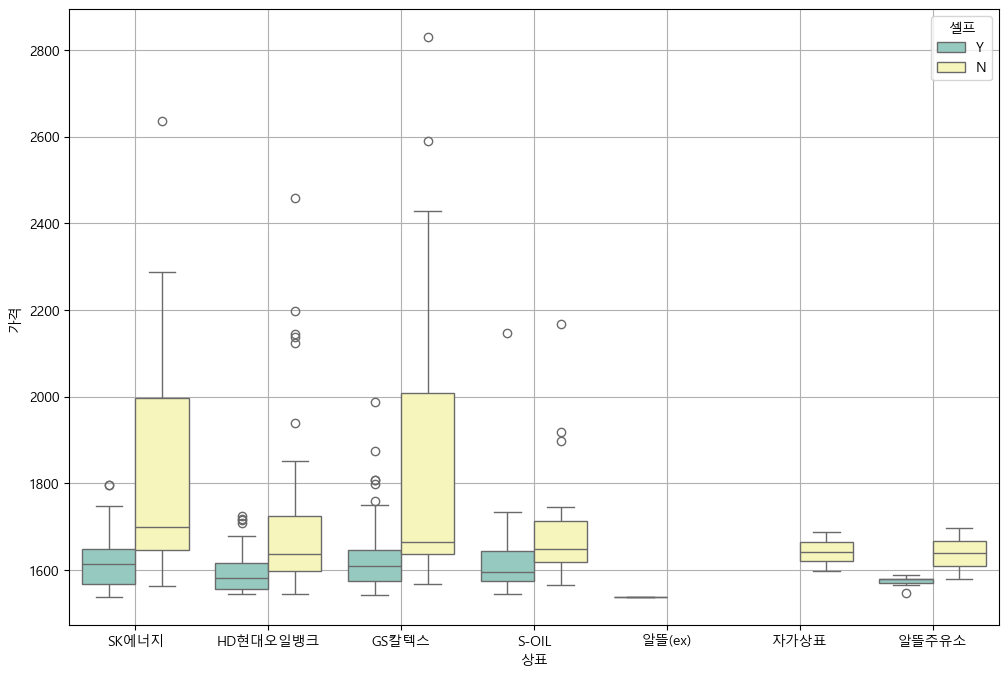

In [86]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3", hue="셀프")
plt.grid(True)
plt.show()

In [88]:
# 지도 시각화

In [89]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [90]:
# 가장 비싼 주유소 10개
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
266,서계주유소,서울 용산구 청파로 367 (청파동),2829.0,N,GS칼텍스,용산구
299,서남주유소,서울 중구 통일로 30,2636.0,N,SK에너지,중구
29,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2590.0,N,GS칼텍스,강남구
28,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2458.0,N,HD현대오일뱅크,강남구
298,필동주유소,서울 중구 퇴계로 196,2429.0,N,GS칼텍스,중구
254,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
264,에너비스,서울 용산구 한남대로 82 (한남동),2287.0,N,SK에너지,용산구
265,한남지점,서울 용산구 한남대로21길 4 (한남동),2287.0,N,SK에너지,용산구
27,SK논현주유소,서울 강남구 논현로 747 (논현동),2285.0,N,SK에너지,강남구
289,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65,2265.0,N,GS칼텍스,종로구


In [91]:
# 가장 값싼 주유소 10개
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
322,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1537.0,Y,SK에너지,강서구
94,만남의광장주유소,서울 서초구 양재대로12길 73-71,1539.0,Y,알뜰(ex),서초구
141,원천주유소,서울 성북구 돌곶이로 142,1543.0,Y,GS칼텍스,성북구
194,HD현대오일뱅크㈜직영 남부순환셀프주유소,서울 양천구 남부순환로 553 (신월동),1544.0,Y,HD현대오일뱅크,양천구
424,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1544.0,Y,HD현대오일뱅크,중랑구
425,우림주유소,서울 중랑구 용마산로 487 (망우제3동),1544.0,Y,GS칼텍스,중랑구
301,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1544.0,Y,HD현대오일뱅크,중랑구
300,우림주유소,서울 중랑구 용마산로 487 (망우제3동),1544.0,Y,GS칼텍스,중랑구
193,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1544.0,Y,SK에너지,양천구
191,신월주유소,서울 양천구 신월로 193 (신월동),1544.0,Y,GS칼텍스,양천구


In [93]:
import numpy as np

gu_data = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1858.866667
강동구,1689.384615
강북구,1565.700000
강서구,1625.272727
관악구,1675.071429


In [103]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
).add_to(my_map)
my_map